In [ ]:
import matplotlib.pyplot as plt

# Data
support = ['Uniform', 'Non Uniform', 'Partial']
joint_scores = [99.98, 99.98, 33.14]
marginal_scores = [98.15, 86.10, 7.40]

# Colors
light_green = '#d9ead3ff'
light_red =  '#f5c4c4ff'

x = range(len(support))
width = 0.4

fig, ax = plt.subplots()

# Plot bars
ax.bar(x, joint_scores, width, label='Joint', color=light_green)
ax.bar([p + width for p in x], marginal_scores, width,
       label='Marginal', color=light_red)

# Annotate differences with vertical arrows
for i, (j_score, m_score) in enumerate(zip(joint_scores, marginal_scores)):
    # Identify top and bottom
    top = max(j_score, m_score)
    bottom = min(j_score, m_score)
    diff = top - bottom
    
    # Horizontal position (between the two bars)
    x_pos = i + width / 2 + 0.1

    mid = (top + bottom) / 2 

    # Draw a vertical arrow from top to bottom
    ax.annotate(
        "",
        xy=(x_pos, top),            # arrow start (top bar)
        xytext=(x_pos, bottom),     # arrow end (bottom bar)
        arrowprops=dict(
            facecolor='red',
            arrowstyle='<->',       # same double-headed style
            lw=1
        ),
    )
    ax.text(x_pos+0.20, mid, f'{diff:.2f}', color='red', fontsize=18,
                ha='center', va='center')


# Formatting
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(support)
ax.set_ylabel(r'Conformity Score$\uparrow$')
ax.set_title('Conformity Score by Support')
ax.legend()

plt.tight_layout()
plt.show()


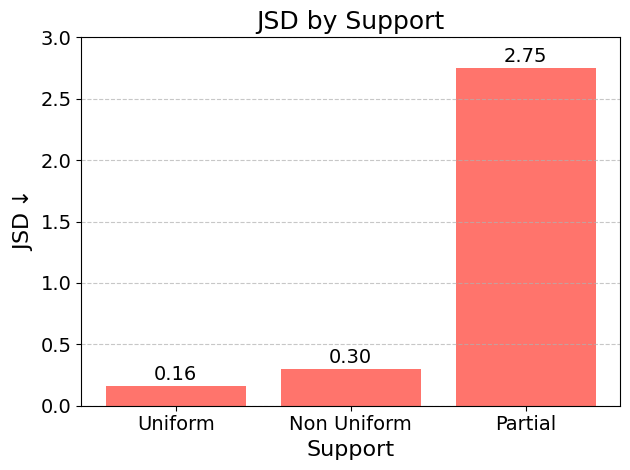

In [1]:
import matplotlib.pyplot as plt

# Data
support = ['Uniform', 'Non Uniform', 'Partial']
jsd_values = [0.16, 0.30, 2.75]

# Light blue color hex code
light_blue = '#FF746C'

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(support, jsd_values, color=light_blue)

# Adding numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.05, f'{height:.2f}', ha='center', fontsize=14)

# Formatting
ax.set_ylabel(r'JSD$\downarrow$', fontsize=16)
ax.set_xlabel('Support', fontsize=16)
#y-axis to move to 3.0
ax.set_ylim(0, 3.0)
ax.set_title('JSD by Support', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


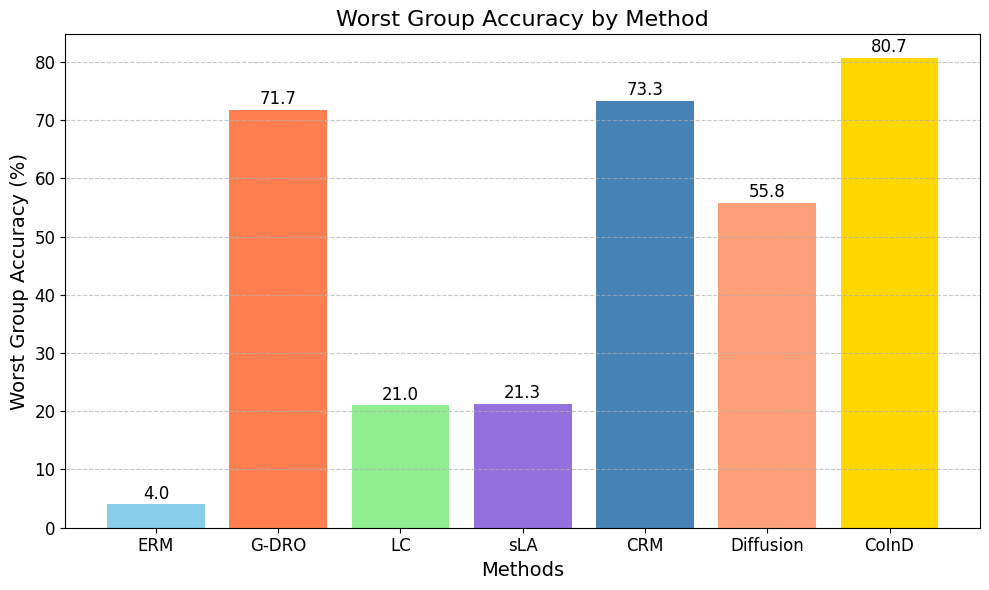

In [2]:
import matplotlib.pyplot as plt

# Data
methods = ['ERM', 'G-DRO', 'LC', 'sLA', 'CRM', 'Diffusion', 'CoInD']
worst_group_acc = [4.0, 71.7, 21.0, 21.3, 73.3, 55.8, 80.7]

# Colors
colors = ['#87CEEB', '#FF7F50', '#90EE90', '#9370DB', '#4682B4', '#FFA07A', '#FFD700']  # CoInD in Gold

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(methods, worst_group_acc, color=colors)

# Adding numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + 1, f'{height:.1f}', ha='center', fontsize=12)

# Formatting
ax.set_ylabel('Worst Group Accuracy (%)', fontsize=14)
ax.set_xlabel('Methods', fontsize=14)
ax.set_title('Worst Group Accuracy by Method', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


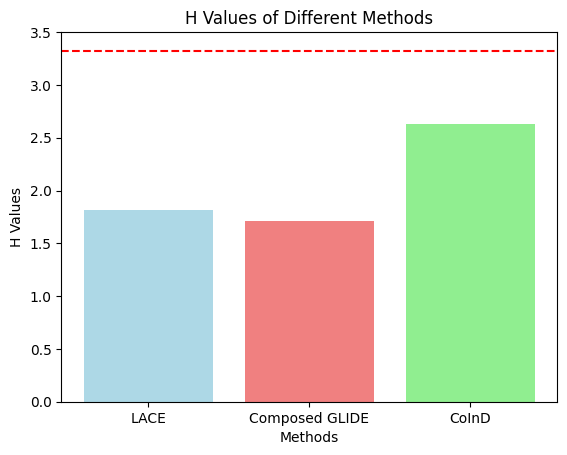

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# Data
methods = ['LACE', 'Composed GLIDE', 'CoInD']
h_values = [1.82, 1.71, 2.63]
colors = ['lightblue', 'lightcoral', 'lightgreen']  # Light blue for LACE and CoInD, light red for Composed GLIDE

# Create the bar chart
plt.bar(methods, h_values, color=colors)


# Add labels and title
plt.xlabel('Methods')
plt.ylabel('H Values')
plt.title('H Values of Different Methods')
plt.axhline(y=np.log2(10), color='r', linestyle='--', label='log2(10)')

plt.ylim(0, 3.5)
#red line at log_2(10)


# Display the chart
plt.show()


In [8]:
#load mnist data
import numpy as np
import torch
from torchvision import datasets, transforms

root_dir = "../data"
mnist = datasets.MNIST(root=root_dir, train=True, transform=transforms.ToTensor(), download=False)


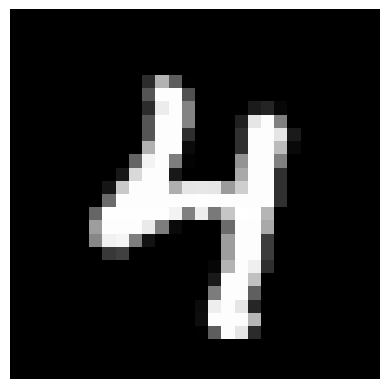

/tmp/ipykernel_174106/1885717181.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  colored_image[:, image[0] != 0] = torch.tensor(normalised_rbg[color]).view(3, 1)


(-0.5, 27.5, 27.5, -0.5)

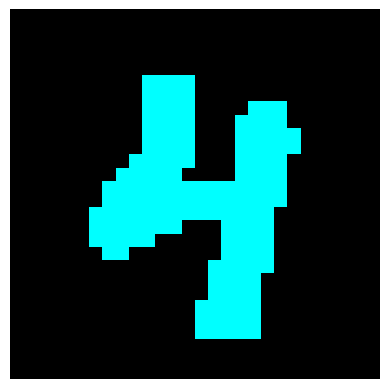

In [33]:
import matplotlib.pyplot as plt
import random


colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'white']
normalised_rbg = {
    'red': [1, 0, 0],
    'green': [0, 1, 0],
    'blue': [0, 0, 1],
    'cyan': [0, 1, 1],
    'magenta': [1, 0, 1],
    'yellow': [1, 1, 0],
    'black': [0, 0, 0],
    'white': [1, 1, 1]
}
#convert normalised rgb to tensor and float
for color in normalised_rbg:
    normalised_rbg[color] = torch.tensor(normalised_rbg[color], dtype=torch.float32)

#color it with cyan color
digit  = random.choice(mnist)
color= random.choice(colors)
def color_the_digit(image, color='cyan'):
    #make the image 3 channel
    colored_image = image.clone().repeat(3, 1, 1)
    #color non zero pixels
    colored_image[:, image[0] != 0] = torch.tensor(normalised_rbg[color]).view(3, 1)
    return colored_image


plt.imshow(digit[0].squeeze(), cmap='gray')
plt.axis('off')
plt.show()

colored_mnist = color_the_digit(digit[0], 'cyan')
plt.imshow(colored_mnist.permute(1, 2, 0))
plt.axis('off')


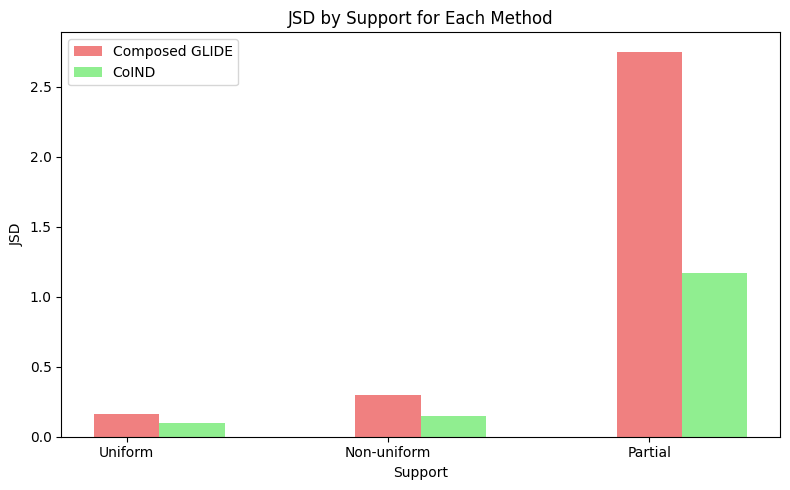

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data for each support category
supports = ['Uniform', 'Non-uniform', 'Partial']
# JSD values: LACE is missing (np.nan), Composed GLIDE and CoIND have provided numbers
jsd_lace = [np.nan, np.nan, np.nan]           # missing values for LACE
jsd_glide = [0.16, 0.30, 2.75]                 # Composed GLIDE
jsd_coind = [0.10, 0.15, 1.17]                 # CoIND (ourmethod lambda=1.0)

# Define bar width and positions for grouped bars
bar_width = 0.25
x = np.arange(len(supports))

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
bars_glide = ax.bar(x, jsd_glide, width=bar_width, label='Composed GLIDE', color='lightcoral')
bars_coind = ax.bar(x + bar_width, jsd_coind, width=bar_width, label='CoIND', color='lightgreen')

# Set labels and title
ax.set_xlabel('Support')
ax.set_ylabel('JSD')
ax.set_title('JSD by Support for Each Method')
ax.set_xticks(x)
ax.set_xticklabels(supports)
ax.legend()

plt.tight_layout()
plt.show()


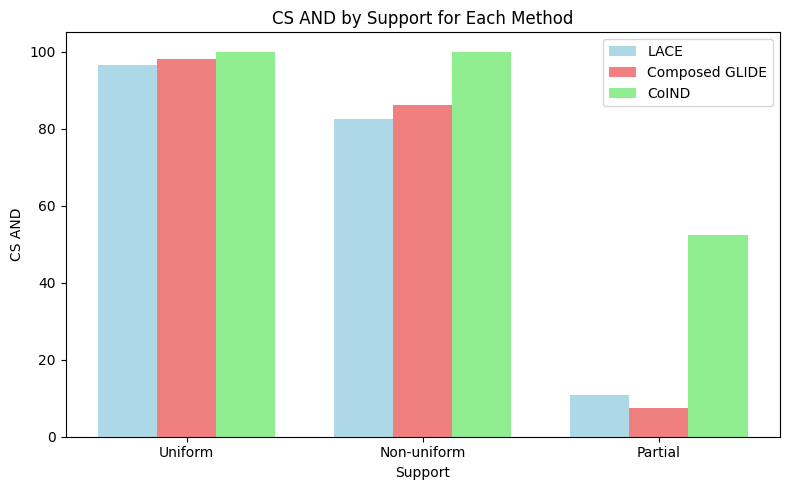

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Supports and corresponding CS AND values for each method
supports = ['Uniform', 'Non-uniform', 'Partial']

# CS AND values:
# Uniform: LACE = 96.40, Composed GLIDE = 98.15, CoIND = 99.99
# Non-uniform: LACE = 82.61, Composed GLIDE = 86.10, CoIND = 99.95
# Partial: LACE = 10.85, Composed GLIDE = 7.40, CoIND = 52.38
cs_and_lace = [96.40, 82.61, 10.85]
cs_and_glide = [98.15, 86.10, 7.40]
cs_and_coind = [99.99, 99.95, 52.38]

# Define bar width and positions for grouped bars
bar_width = 0.25
x = np.arange(len(supports))

fig, ax = plt.subplots(figsize=(8, 5))

# Plot grouped bars
bars_lace = ax.bar(x - bar_width, cs_and_lace, width=bar_width, label='LACE', color='lightblue')
bars_glide = ax.bar(x, cs_and_glide, width=bar_width, label='Composed GLIDE', color='lightcoral')
bars_coind = ax.bar(x + bar_width, cs_and_coind, width=bar_width, label='CoIND', color='lightgreen')

# Setting labels and title
ax.set_xlabel('Support')
ax.set_ylabel('CS AND')
ax.set_title('CS AND by Support for Each Method')
ax.set_xticks(x)
ax.set_xticklabels(supports)
ax.legend()

plt.tight_layout()
plt.show()


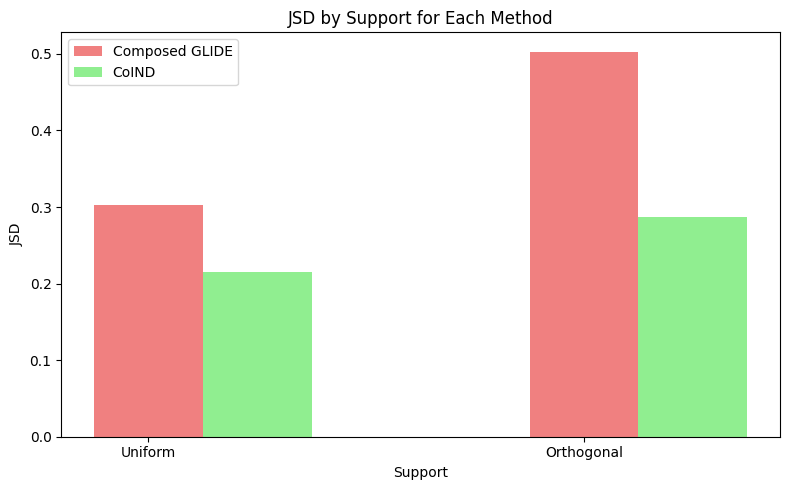

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the supports and corresponding JSD values for each method.
supports = ['Uniform', 'Orthogonal']

# For LACE the JSD values are missing; we'll represent them as np.nan.
jsd_lace = [np.nan, np.nan]
jsd_glide = [0.302, 0.503]
jsd_coind = [0.215, 0.287]

# Set bar width and positions for grouped bars.
bar_width = 0.25
x = np.arange(len(supports))

fig, ax = plt.subplots(figsize=(8, 5))

# Plot grouped bars for each method.
# bars_lace = ax.bar(x - bar_width, jsd_lace, width=bar_width, label='LACE', color='lightblue')
bars_glide = ax.bar(x, jsd_glide, width=bar_width, label='Composed GLIDE', color='lightcoral')
bars_coind = ax.bar(x + bar_width, jsd_coind, width=bar_width, label='CoIND', color='lightgreen')

# Set labels, title, and legend.
ax.set_xlabel('Support')
ax.set_ylabel('JSD')
ax.set_title('JSD by Support for Each Method')
ax.set_xticks(x)
ax.set_xticklabels(supports)
ax.legend()

plt.tight_layout()
plt.show()


<>:35: SyntaxWarning: invalid escape sequence '\('
<>:38: SyntaxWarning: invalid escape sequence '\('
<>:48: SyntaxWarning: invalid escape sequence '\('
<>:35: SyntaxWarning: invalid escape sequence '\('
<>:38: SyntaxWarning: invalid escape sequence '\('
<>:48: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_544786/1266350563.py:35: SyntaxWarning: invalid escape sequence '\('
  ax1.set_ylabel('CS (\(\land\) Composition)')
/tmp/ipykernel_544786/1266350563.py:38: SyntaxWarning: invalid escape sequence '\('
  ax1.set_title('\(\land\) Composition CS')
/tmp/ipykernel_544786/1266350563.py:48: SyntaxWarning: invalid escape sequence '\('
  ax2.set_title('\(\neg\) Composition CS')


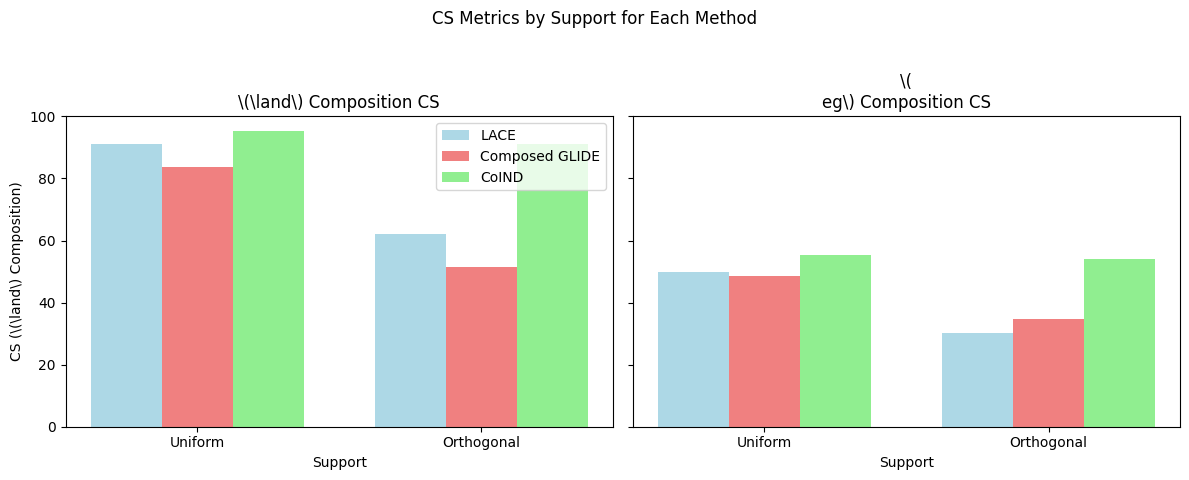

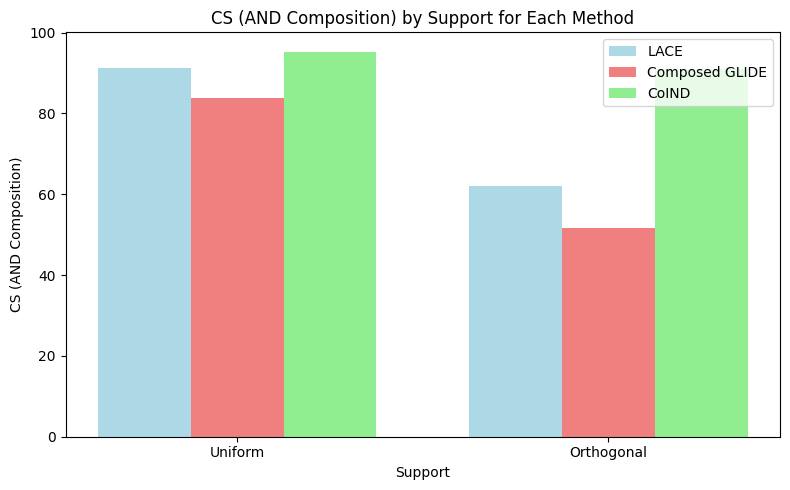

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define supports
supports = ['Uniform', 'Orthogonal']
x = np.arange(len(supports))
bar_width = 0.25

# CS values for \(\land\) Composition (CS AND):
# Uniform: LACE = 91.19, Composed GLIDE = 83.75, CoIND = 95.31
# Orthogonal: LACE = 62.07, Composed GLIDE = 51.56, CoIND = 91.10
cs_and_lace = [91.19, 62.07]
cs_and_glide = [83.75, 51.56]
cs_and_coind = [95.31, 91.10]

fig, ax = plt.subplots(figsize=(8, 5))

# Plot grouped bars
ax.bar(x - bar_width, cs_and_lace, width=bar_width, label='LACE', color='lightblue')
ax.bar(x, cs_and_glide, width=bar_width, label='Composed GLIDE', color='lightcoral')
ax.bar(x + bar_width, cs_and_coind, width=bar_width, label='CoIND', color='lightgreen')

# Customize plot
ax.set_xlabel('Support')
ax.set_ylabel('CS (AND Composition)')
ax.set_title('CS (AND Composition) by Support for Each Method')
ax.set_xticks(x)
ax.set_xticklabels(supports)
ax.legend()

plt.tight_layout()
plt.show()
